In [54]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Sütunların Açıklamaları

PassengerId: Yolcu numarası

Survived:	Survival	0 = Hayır, 1 = Evet

Pclass:	Bilet Sınıfı	1 = 1st, 2 = 2nd, 3 = 3rd

Sex:	Cinsiyet	

Age:	Yaş

SibSp:	# beraber yolculuk yaptığı kardeş ve eş sayısı	

Parch:	# Beraber yolculuk yaptığı çocuk ve aile sayısı	

Ticket:	Bilet Numarası

Fare:	Ödediği ücret	

Cabin:	Kaldığı oda numarası

Embarked:	Bindiği Liman	C = Cherbourg, Q = Queenstown, S = Southampton

In [55]:
train_path = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/Assignments/Assignment8/Dataset/Classifier/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/Assignments/Assignment8/Dataset/Classifier/test.csv'
y_test_path = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/Assignments/Assignment8/Dataset/Classifier/gender_submission.csv'

In [56]:
y_test = pd.read_csv(y_test_path)
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [57]:
y_test = y_test.drop(['PassengerId'], axis=1)
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [58]:
train_data = pd.read_csv(train_path)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
test_data = pd.read_csv(test_path)
test_data = pd.read_csv(test_path)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [62]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

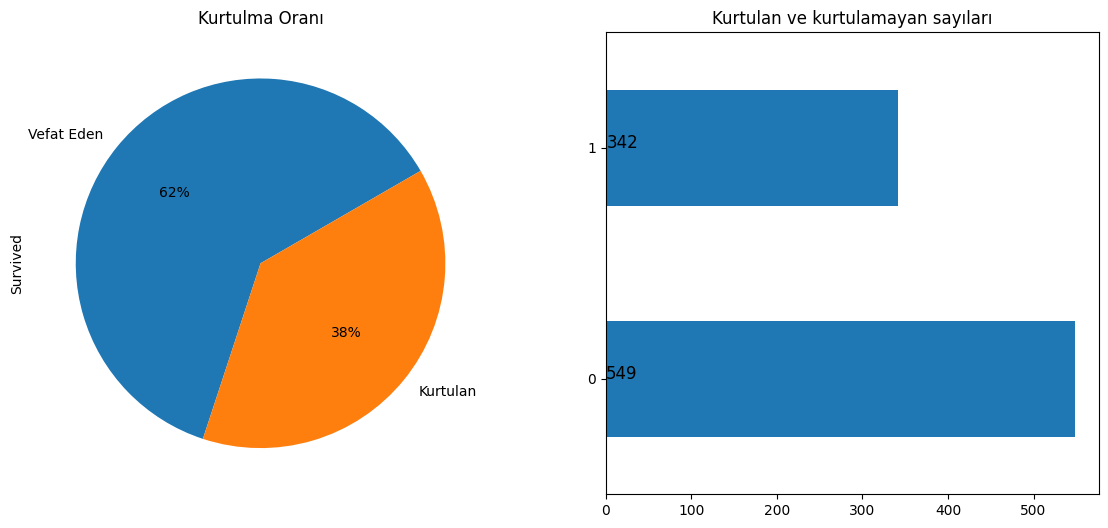

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = train_data['Survived'].value_counts().plot.pie( 
    x="Yolcu sayısı",
    y ='Vefat Eden Sayısı', 
    autopct = "%1.0f%%",
    labels=["Vefat Eden","Kurtulan"], 
    startangle = 30,
    ax=ax1
);
ax1.set(title = "Kurtulma Oranı")

ax2 = train_data["Survived"].value_counts().plot(kind="barh" ,ax=ax2)

for i,j in enumerate(train_data["Survived"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
    
ax2.set(title = "Kurtulan ve kurtulamayan sayıları")
plt.show()

In [64]:
def bar(variable):
  cat = train_data[variable]
  num = cat.value_counts()
  plt.figure(figsize=(9,3))
  plt.bar(num.index, num)
  plt.xticks(num.index, num.index.values)
  plt.ylabel("frekans")
  plt.title(variable)
  plt.show()
  print(variable, num)

In [65]:
def hist(variable):
  plt.figure(figsize=(9,3))
  plt.hist(train_data[variable])
  plt.ylabel("frekans")
  plt.title(variable)
  plt.show()

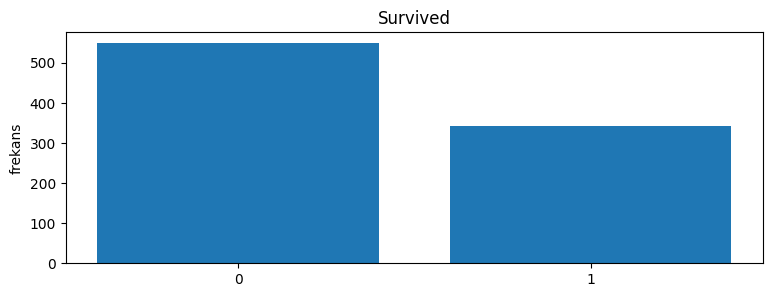

Survived 0    549
1    342
Name: Survived, dtype: int64


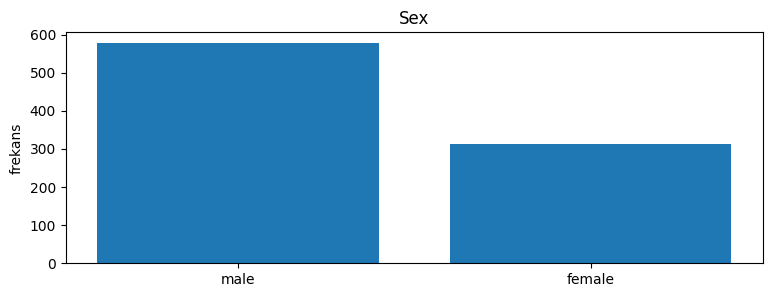

Sex male      577
female    314
Name: Sex, dtype: int64


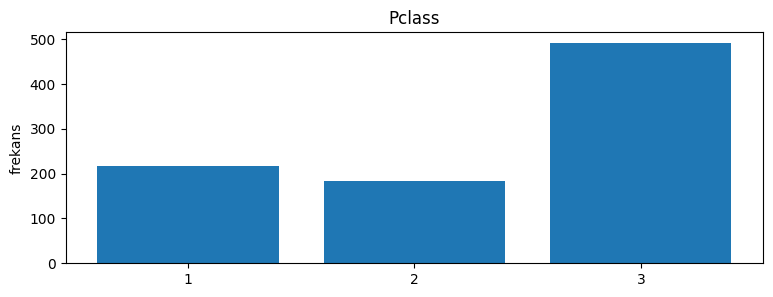

Pclass 3    491
1    216
2    184
Name: Pclass, dtype: int64


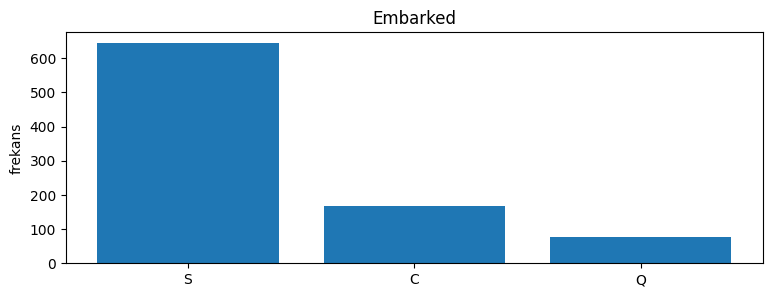

Embarked S    644
C    168
Q     77
Name: Embarked, dtype: int64


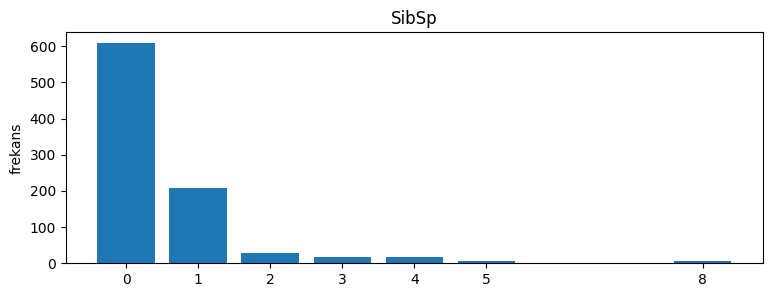

SibSp 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


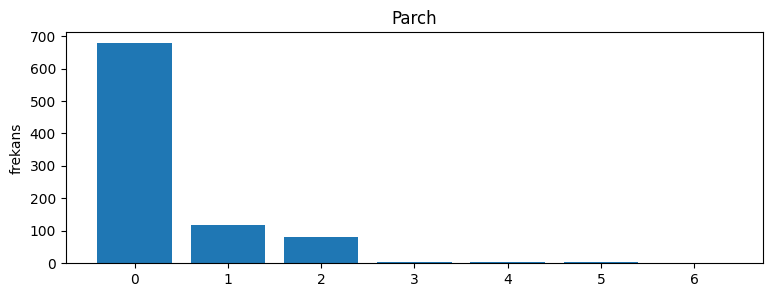

Parch 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [66]:
variables = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for variable in variables:
  bar(variable)

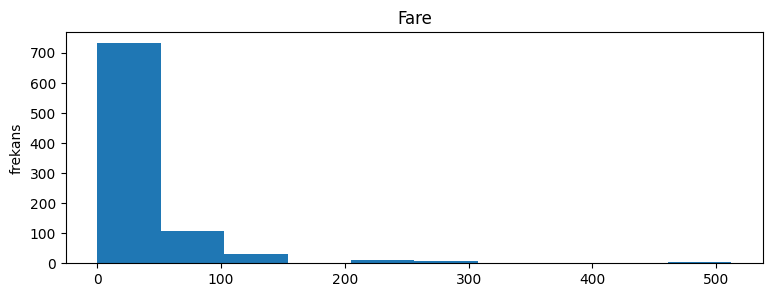

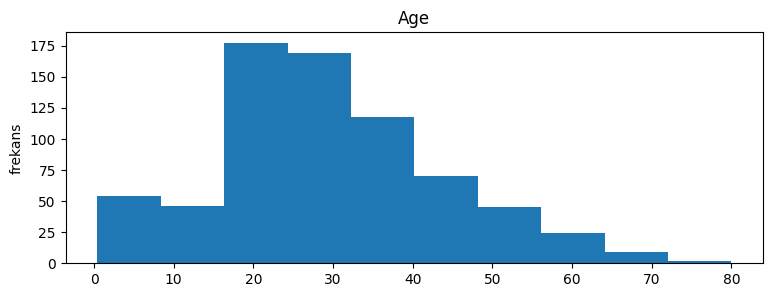

In [67]:
variables = ["Fare", "Age"]
for variable in variables:
  hist(variable)

In [68]:
train_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


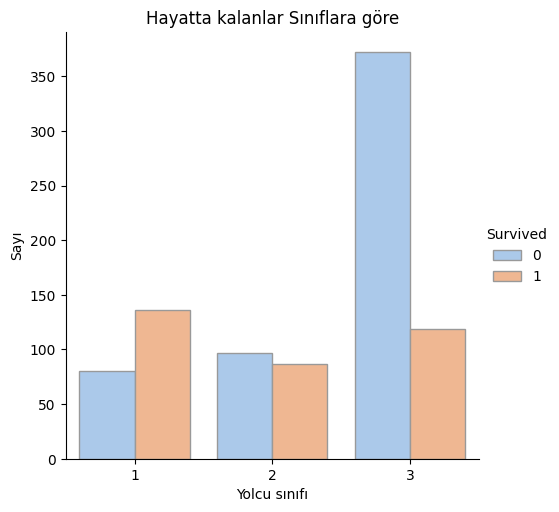

In [69]:
sns.catplot(x='Pclass', hue='Survived', kind='count', data=train_data, palette='pastel', edgecolor='.6')

plt.xlabel('Yolcu sınıfı')
plt.ylabel('Sayı')
plt.title('Hayatta kalanlar Sınıflara göre')

plt.show()

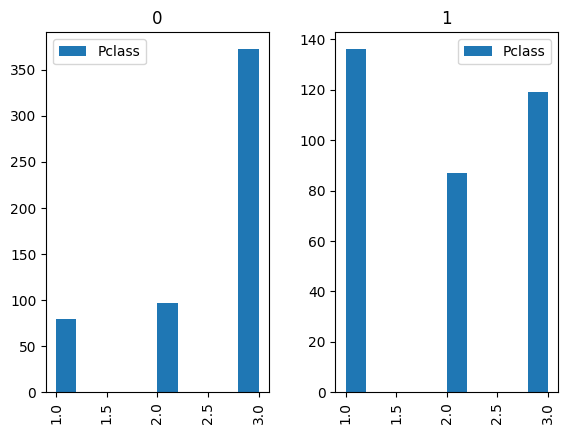

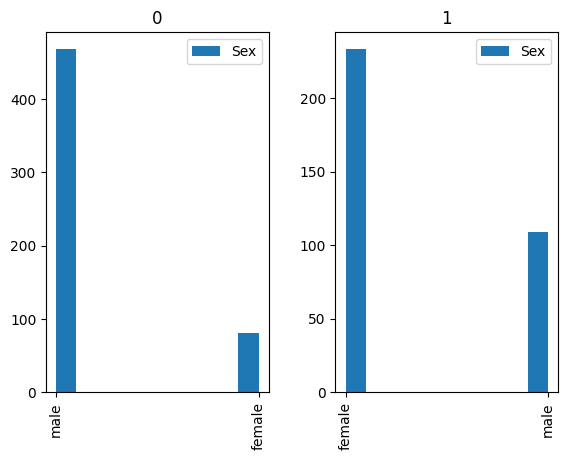

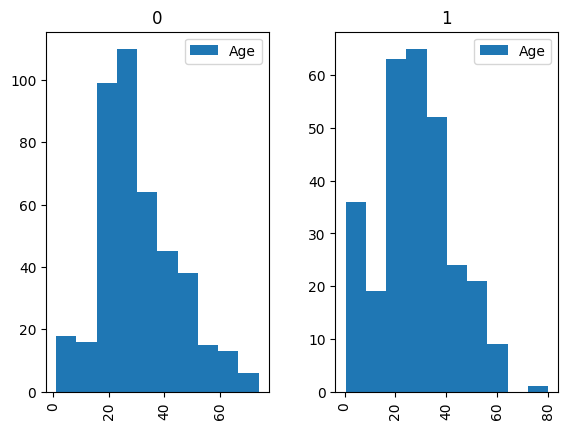

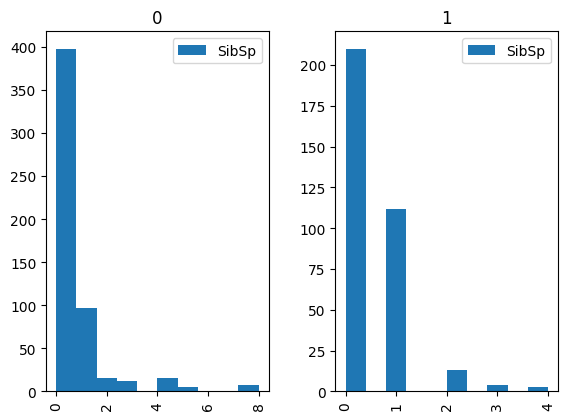

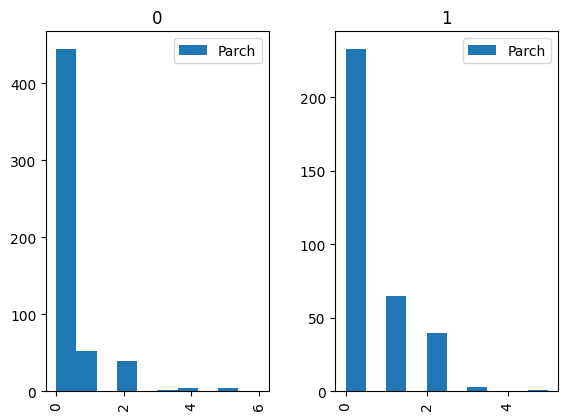

In [70]:
for i, column in enumerate(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']):
  train_data[column].hist(by=train_data["Survived"], legend=True)

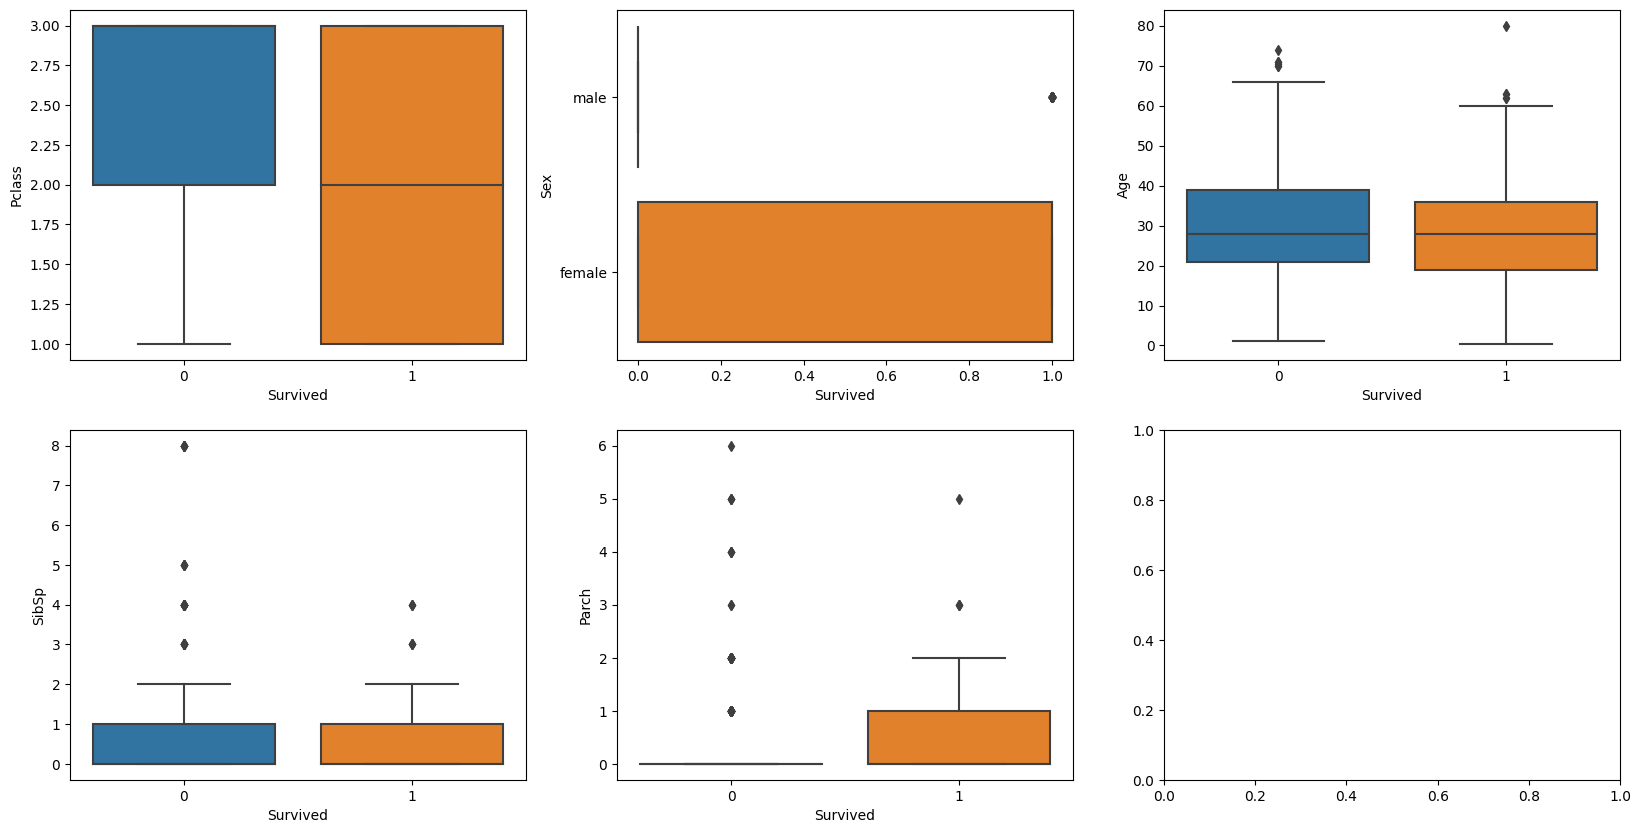

In [71]:
columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(columns):
    sns.boxplot(x="Survived", y=col, data=train_data, ax=ax[i//3][i%3])

<ipython-input-72-d850c48ffce5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm");


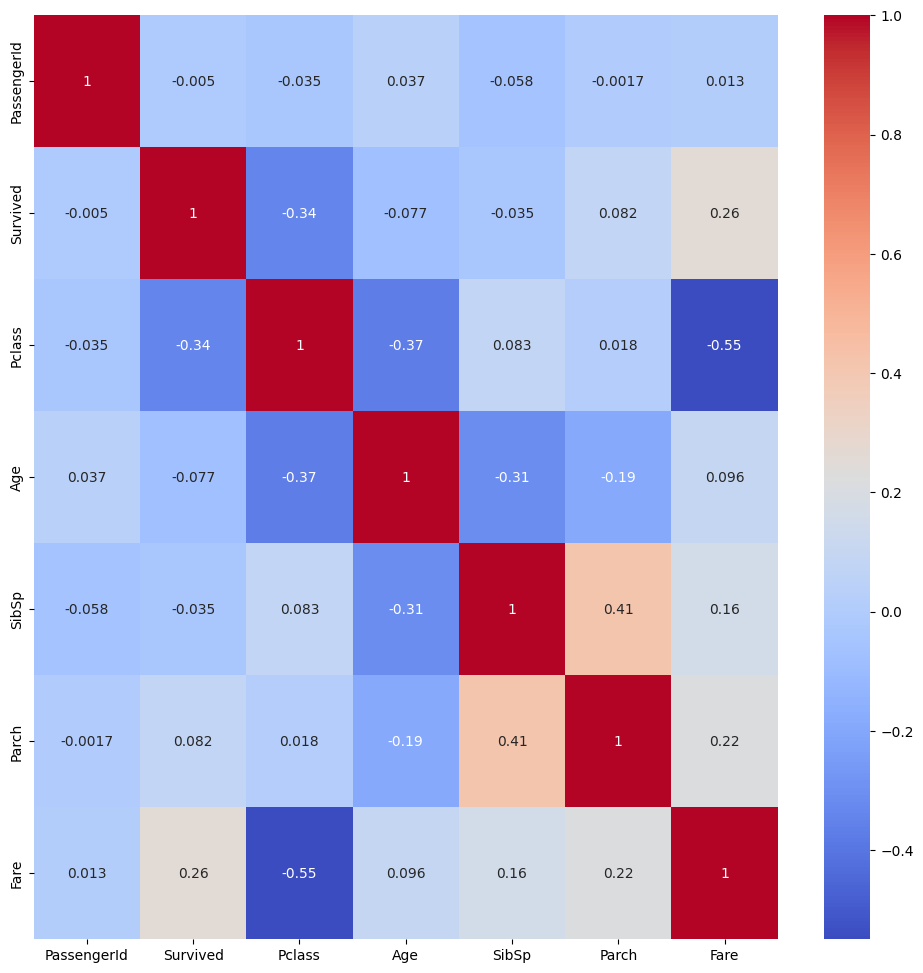

In [72]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm");

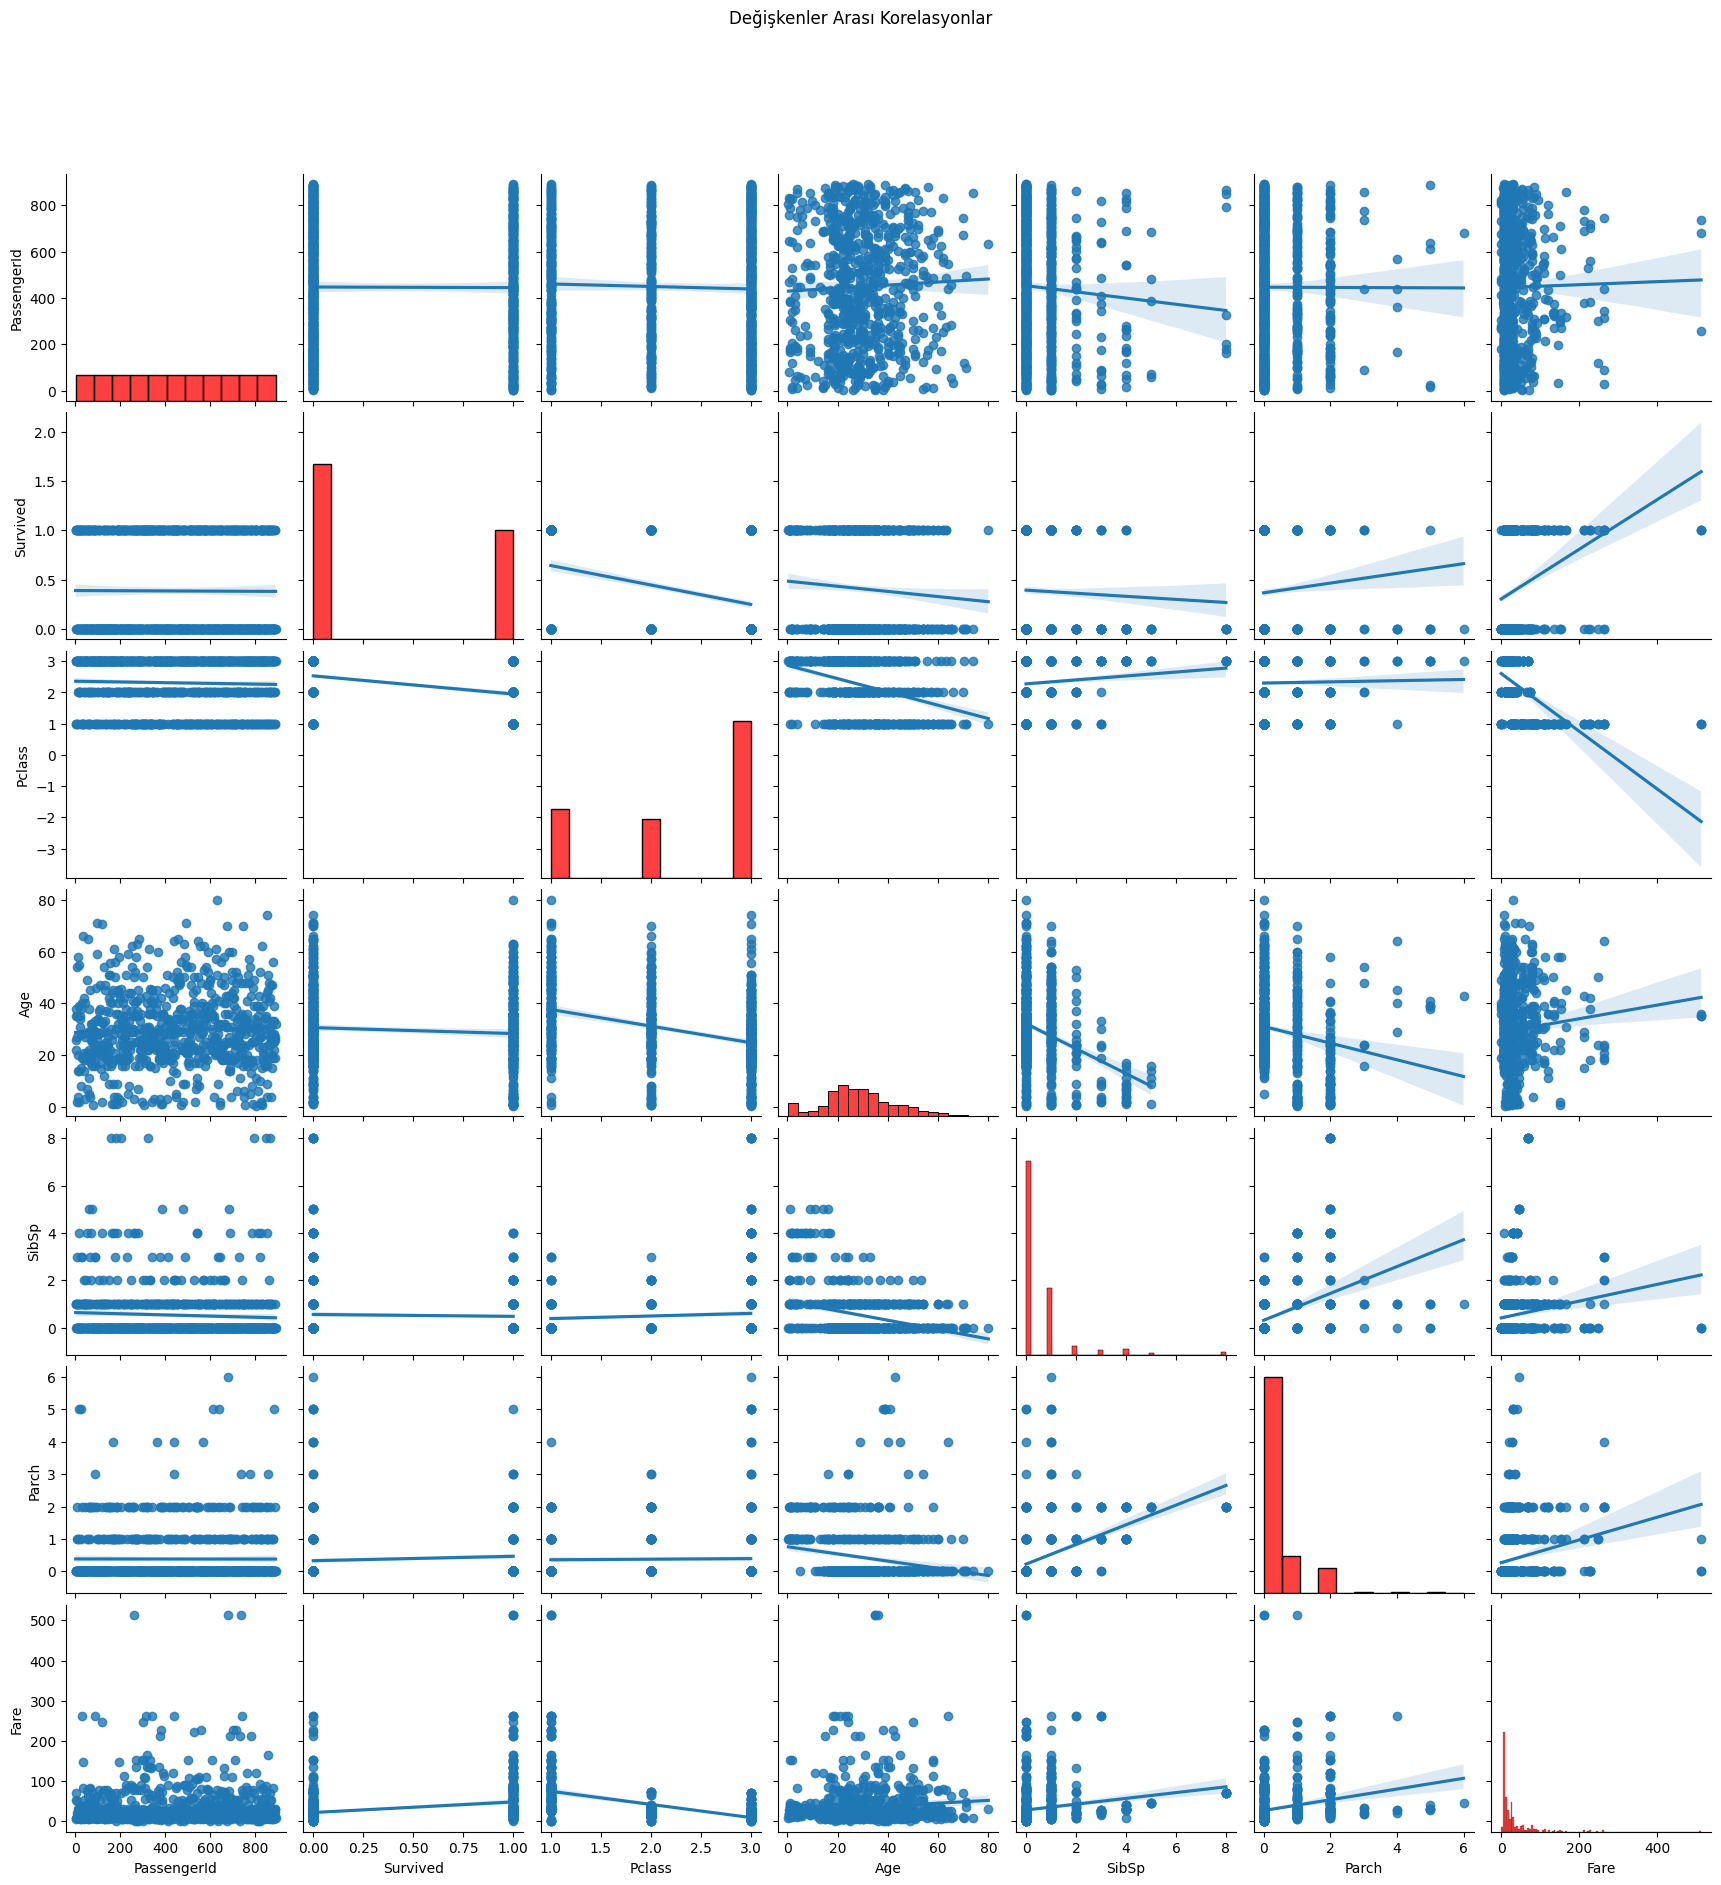

In [73]:
g= sns.pairplot(train_data ,kind="reg",diag_kws= {'color': 'red'})
g.fig.suptitle("Değişkenler Arası Korelasyonlar", y=1.08)
plt.show()

## Modellerin Oluşturulması

In [74]:
train_data.drop_duplicates(inplace=True)

In [75]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)

In [76]:
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)

In [77]:
y_train = train_data['Survived']
X_train = train_data.drop(['Survived', 'PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [78]:
train_data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin          687
dtype: int64

In [79]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
X_test = test_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
X_test["Age"].fillna(X_test["Age"].median(skipna=True), inplace=True)
X_test["Fare"].fillna(X_test["Fare"].median(skipna=True), inplace=True)
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [85]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [86]:
sex_le = LabelEncoder()
X_train['Sex'] = sex_le.fit_transform(X_train['Sex'])
X_test['Sex'] = sex_le.fit_transform(X_test['Sex'])
X_train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [87]:
embarked_le = LabelEncoder()
X_train['Embarked'] = embarked_le.fit_transform(X_train['Embarked'])
X_test['Embarked'] = embarked_le.fit_transform(X_test['Embarked'])
X_train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [88]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [89]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [90]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Modellerin oluşturulması

In [91]:
def show_roc_curve(model, model_name, X_test, y_test):
  y_scores = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic of ' + model_name)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of ' + model_name)
  plt.show()

In [92]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

In [93]:
def add_scores(y_test, y_test_pred, model_name):
  acc = accuracy_score(y_test, y_test_pred)
  rec = recall_score(y_test, y_test_pred)
  prec = precision_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  model_performance.loc[model_name] = [acc, rec, prec, f1]
  print(model_performance.sort_values("F1-Score", ascending=False))

In [94]:
def accuracy_graph(gscv):
  test_scores = gscv.cv_results_['mean_test_score']
  train_scores = gscv.cv_results_['mean_train_score'] 

  plt.plot(test_scores, label='test')
  plt.plot(train_scores, label='train')
  plt.legend(loc='best')
  plt.show()

## Decision Tree

In [95]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt_gscv = GridSearchCV(dt, param_grid, cv=5, return_train_score=True)
dt_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(dt_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,21,16,11,30,40
mean_fit_time,0.001697,0.002163,0.002406,0.001325,0.001939
std_fit_time,0.000051,0.000371,0.000912,0.000011,0.000013
mean_score_time,0.000691,0.000869,0.000904,0.000709,0.000702
std_score_time,0.000022,0.000167,0.000133,0.000034,0.000017
param_criterion,gini,gini,gini,entropy,entropy
param_max_depth,20,10,5,3,10
param_min_samples_leaf,10,10,10,5,5
params,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...","{'criterion': 'gini', 'max_depth': 10, 'min_sa...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
split0_test_score,0.787709,0.787709,0.821229,0.821229,0.759777
split1_test_score,0.820225,0.820225,0.797753,0.814607,0.786517


In [96]:
print(f"En iyi parametreler {dt_gscv.best_params_}, en iyi skor {dt_gscv.best_score_}")

En iyi parametreler {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}, en iyi skor 0.8182160567447117


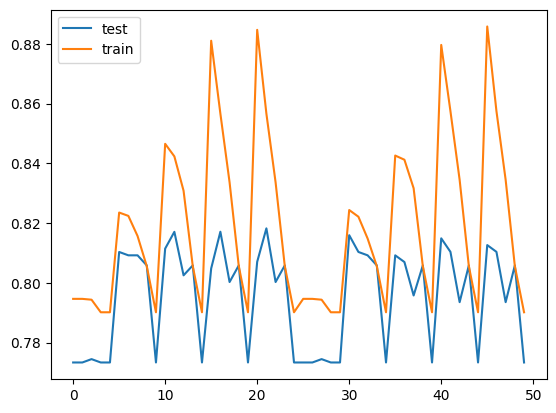

In [97]:
accuracy_graph(dt_gscv)

In [98]:
best_dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, criterion="gini")
best_dt.fit(X_train_scaled, y_train)
y_test_pred = best_dt.predict(X_test_scaled)

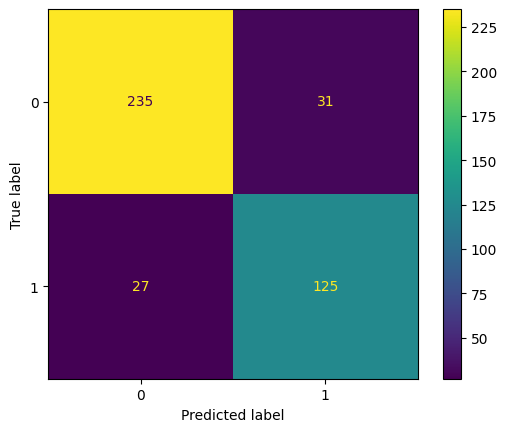

In [99]:
y_test_pred = best_dt.predict(X_test_scaled)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [100]:
print(classification_report(y_test, y_test_pred, target_names = ['Dead', 'Survived']))

              precision    recall  f1-score   support

        Dead       0.90      0.88      0.89       266
    Survived       0.80      0.82      0.81       152

    accuracy                           0.86       418
   macro avg       0.85      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



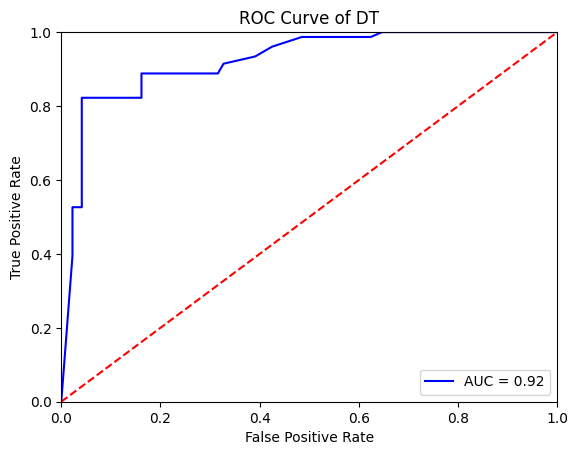

In [101]:
show_roc_curve(best_dt, 'DT', X_test_scaled, y_test)

In [102]:
add_scores(y_test, y_test_pred, "DT")

    Accuracy    Recall  Precision  F1-Score
DT  0.861244  0.822368   0.801282  0.811688


## Random Forest

In [109]:
rf = RandomForestClassifier()
param_grid = {
  'max_depth': [3,4,5,6,7, None],
  'min_samples_leaf': [1, 2, 4],
  'n_estimators': [100, 150, 200]
}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, return_train_score=True)
rf_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(rf_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,36,50,49,48,53
mean_fit_time,0.178473,0.373333,0.313708,0.288747,0.362349
std_fit_time,0.004702,0.00677,0.062062,0.002782,0.011126
mean_score_time,0.013437,0.025617,0.021977,0.019403,0.025424
std_score_time,0.001646,0.000837,0.003576,0.001784,0.000472
param_max_depth,7,None,None,None,None
param_min_samples_leaf,1,2,2,2,4
param_n_estimators,100,200,150,100,200
params,"{'max_depth': 7, 'min_samples_leaf': 1, 'n_est...","{'max_depth': None, 'min_samples_leaf': 2, 'n_...","{'max_depth': None, 'min_samples_leaf': 2, 'n_...","{'max_depth': None, 'min_samples_leaf': 2, 'n_...","{'max_depth': None, 'min_samples_leaf': 4, 'n_..."
split0_test_score,0.810056,0.815642,0.821229,0.798883,0.798883
split1_test_score,0.820225,0.814607,0.814607,0.808989,0.803371


In [110]:
print(f"En iyi parametreler {rf_gscv.best_params_}, en iyi skor {rf_gscv.best_score_}")

En iyi parametreler {'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 100}, en iyi skor 0.8305504990270542


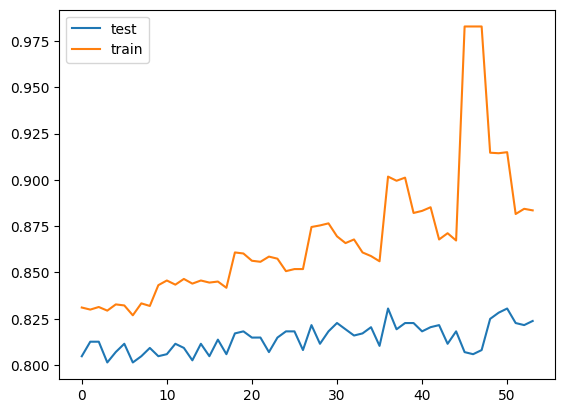

In [111]:
accuracy_graph(rf_gscv)

In [112]:
best_rf = RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=100)
best_rf.fit(X_train_scaled, y_train)
y_test_pred = best_rf.predict(X_test_scaled)

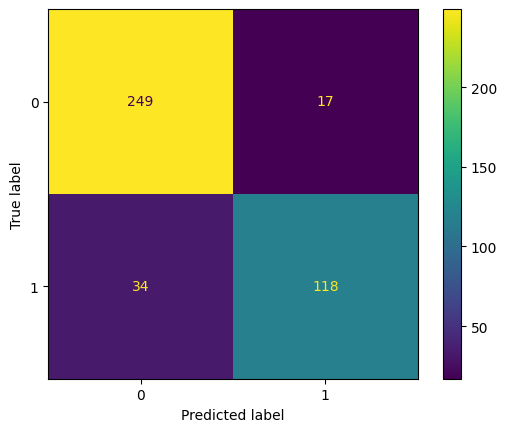

In [113]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [114]:
print(classification_report(y_test, y_test_pred, target_names = ['Dead', 'Survived']))

              precision    recall  f1-score   support

        Dead       0.88      0.94      0.91       266
    Survived       0.87      0.78      0.82       152

    accuracy                           0.88       418
   macro avg       0.88      0.86      0.86       418
weighted avg       0.88      0.88      0.88       418



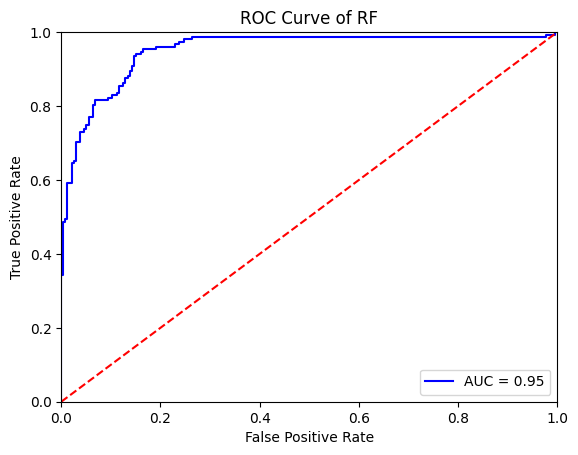

In [115]:
show_roc_curve(best_rf, 'RF', X_test_scaled, y_test)

In [116]:
add_scores(y_test, y_test_pred, "RF")

    Accuracy    Recall  Precision  F1-Score
RF  0.877990  0.776316   0.874074  0.822300
DT  0.861244  0.822368   0.801282  0.811688


## GradientBoosting

In [118]:
gb = GradientBoostingClassifier()
param_grid = {
  'max_depth': np.arange(5,9, 1),
  'min_samples_leaf': [1, 2, 4],
  'n_estimators': [100, 150, 200]
}
gb_gscv = GridSearchCV(gb, param_grid, cv=5, return_train_score=True)
gb_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(gb_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,0,6,3,1,7
mean_fit_time,0.212247,0.199808,0.415925,0.327566,0.289415
std_fit_time,0.006257,0.011937,0.152965,0.025488,0.004664
mean_score_time,0.002052,0.001896,0.002821,0.002441,0.002181
std_score_time,0.000308,0.000077,0.00013,0.000336,0.000052
param_max_depth,5,5,5,5,5
param_min_samples_leaf,1,4,2,1,4
param_n_estimators,100,100,100,150,150
params,"{'max_depth': 5, 'min_samples_leaf': 1, 'n_est...","{'max_depth': 5, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 5, 'min_samples_leaf': 2, 'n_est...","{'max_depth': 5, 'min_samples_leaf': 1, 'n_est...","{'max_depth': 5, 'min_samples_leaf': 4, 'n_est..."
split0_test_score,0.815642,0.798883,0.798883,0.798883,0.804469
split1_test_score,0.831461,0.814607,0.820225,0.825843,0.803371


In [119]:
print(f"En iyi parametreler {gb_gscv.best_params_}, en iyi skor {gb_gscv.best_score_}")

En iyi parametreler {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}, en iyi skor 0.8350386039796623


In [120]:
best_gb = GradientBoostingClassifier(max_depth=5, min_samples_leaf=1, n_estimators=100)
best_gb.fit(X_train_scaled, y_train)
y_test_pred = best_gb.predict(X_test_scaled)

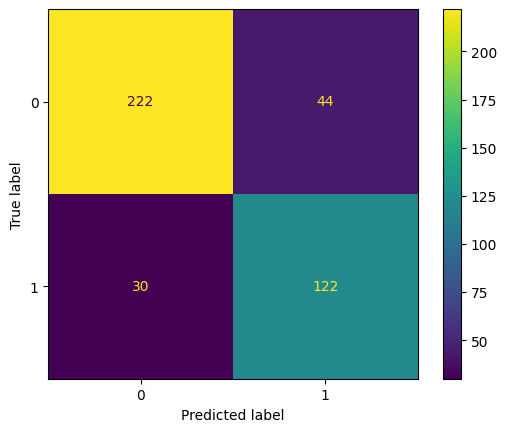

In [121]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [122]:
print(classification_report(y_test, y_test_pred, target_names = ['Dead', 'Survived']))

              precision    recall  f1-score   support

        Dead       0.88      0.83      0.86       266
    Survived       0.73      0.80      0.77       152

    accuracy                           0.82       418
   macro avg       0.81      0.82      0.81       418
weighted avg       0.83      0.82      0.82       418



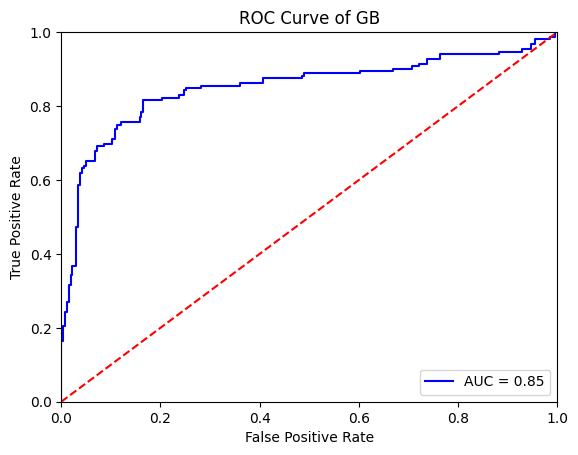

In [125]:
show_roc_curve(best_gb, 'GB', X_test_scaled, y_test)

In [124]:
add_scores(y_test, y_test_pred, "GB")

    Accuracy    Recall  Precision  F1-Score
RF  0.877990  0.776316   0.874074  0.822300
DT  0.861244  0.822368   0.801282  0.811688
GB  0.822967  0.802632   0.734940  0.767296
